In [2]:
from read_data import *
import numpy as np
import math
import vlc
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd

In [3]:
data = process_data()

In [4]:
pascal_array = data["V2_00001"]["dat"]["CH4_akustik"]
time = data["V2_00001"]["dat"]["time"]

In [5]:
def plot_ts(data, time, dset):
    plt.figure(figsize=(10, 6))
    plt.plot(time, data)
    plt.title(dset)
    plt.show()

['vc=120', 'f=0.185']
['vc=120', 'f=0.185']


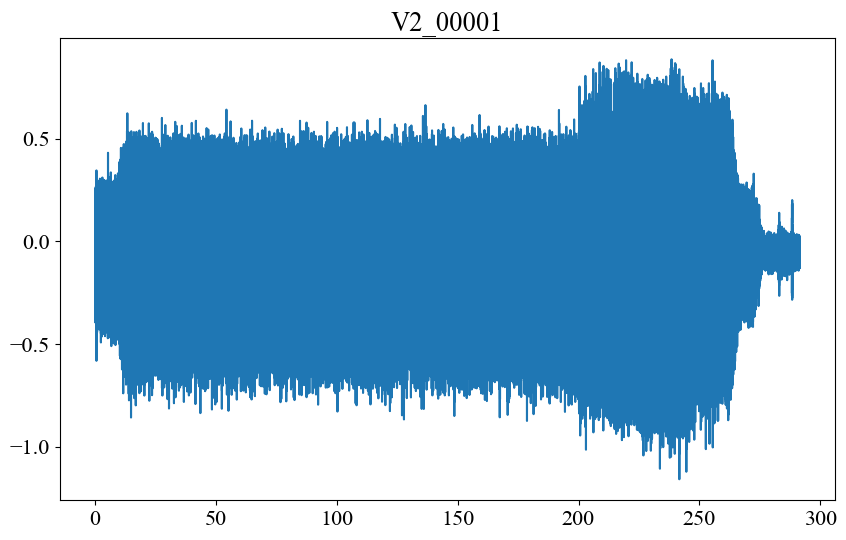

['Schneiden', 'v_c=111 m/min', 'f=0.231 mm', 'V_oel=229 l/min']


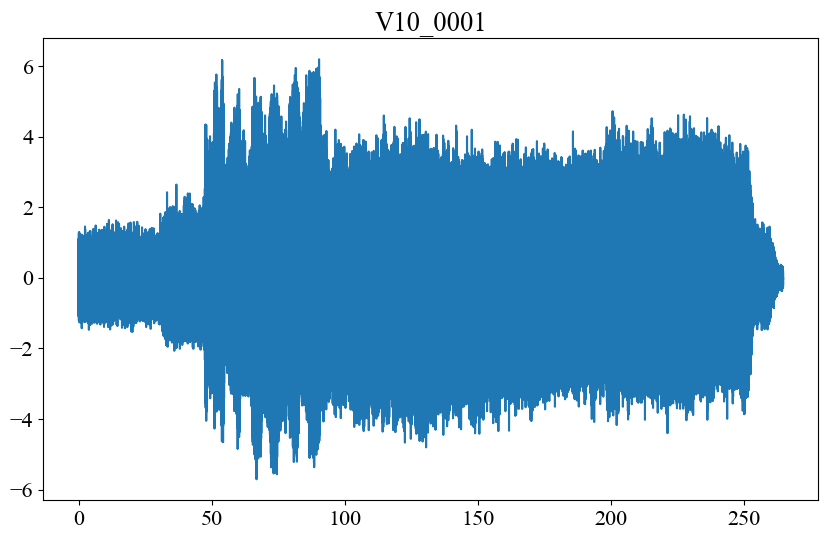

['vc=111m/min', 'f=0.231mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']


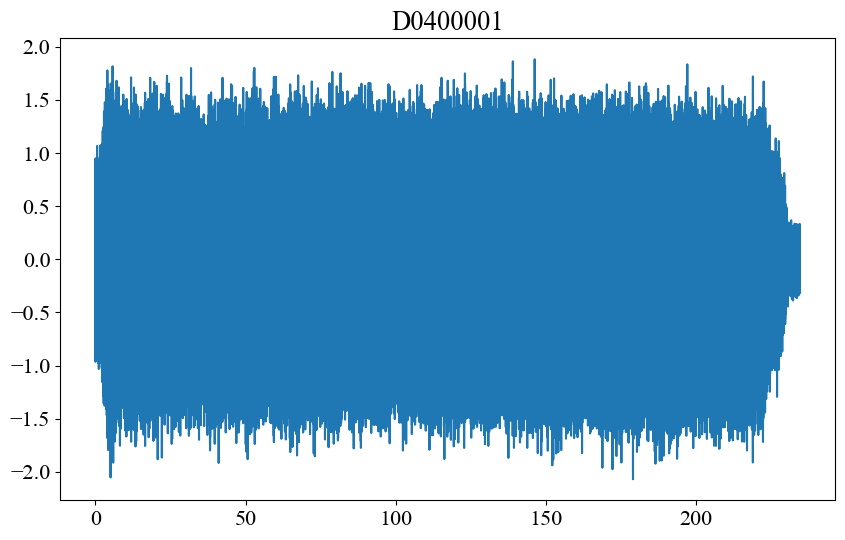

['vc=120m/min', 'f=0.185mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']


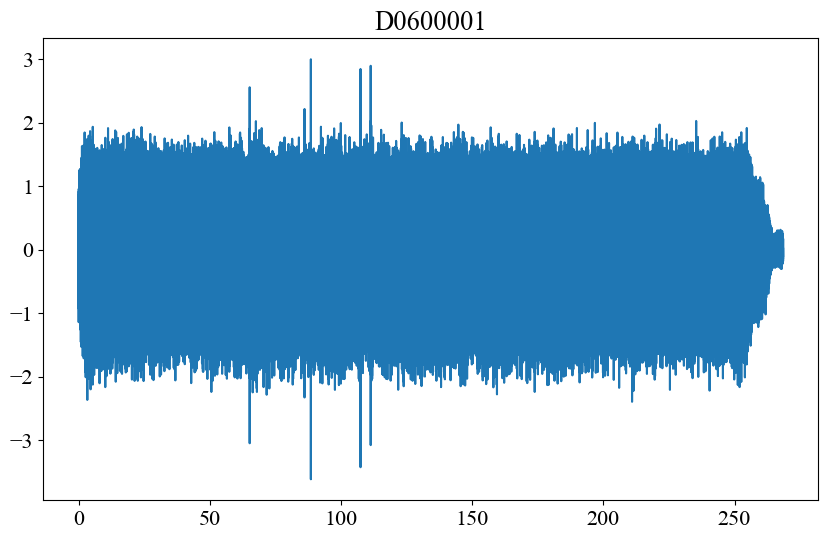

['vc=90m/min', 'f=0.250mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']


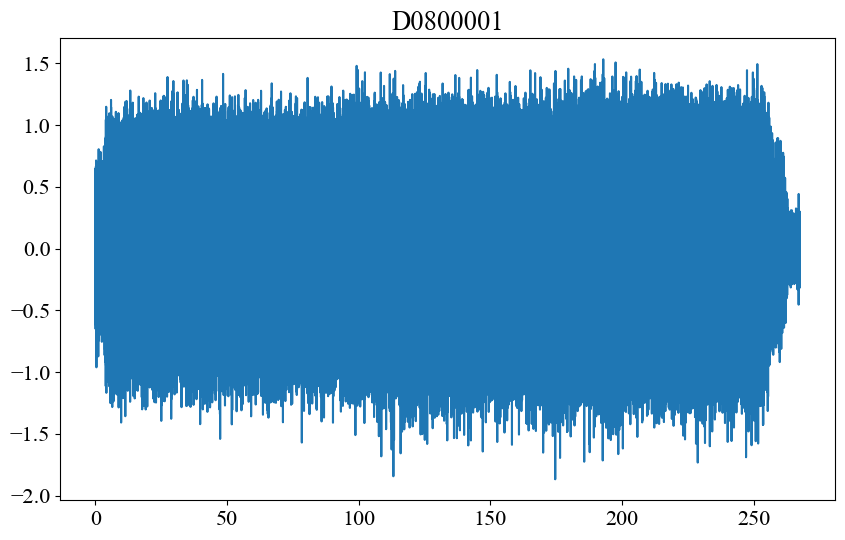

['Schneiden', 'v_c=111 m/min', 'f=0.231 mm', 'V_oel=371 l/min']


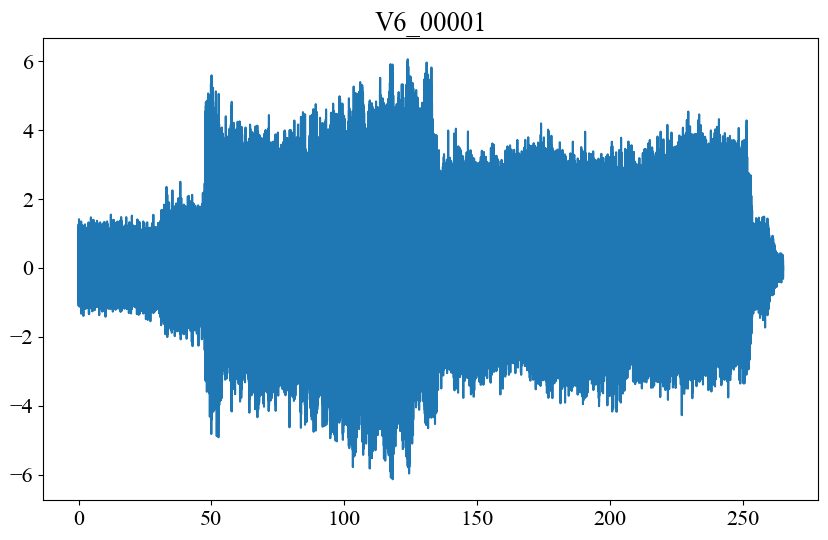

['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']


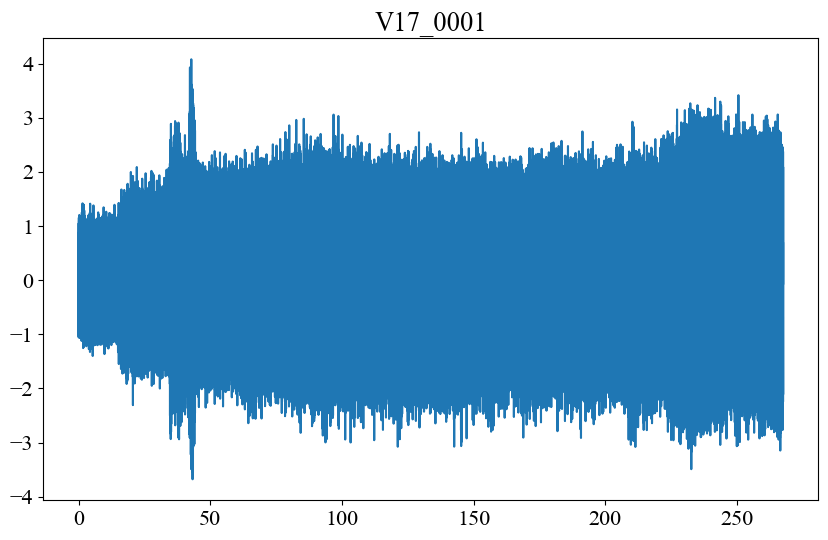

['Schneiden', 'v_c=90 m/min', 'f=0.250 mm', 'V_oel=300 l/min']


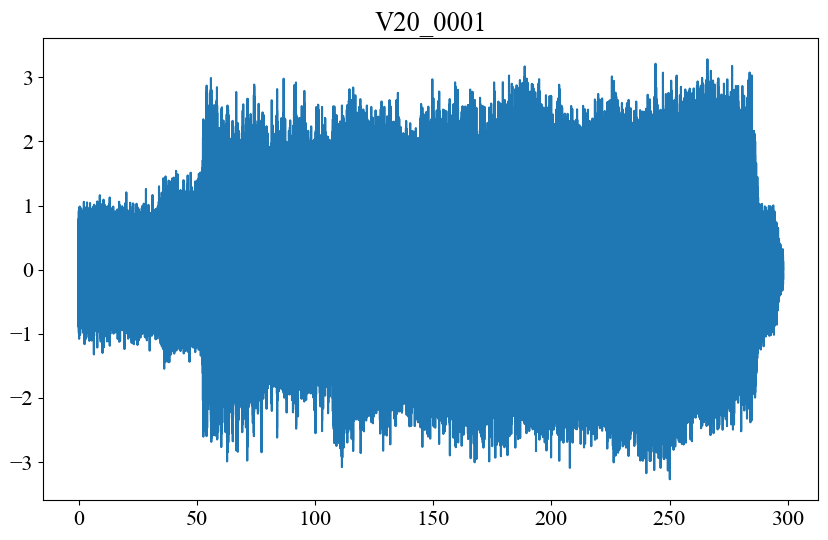

['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']


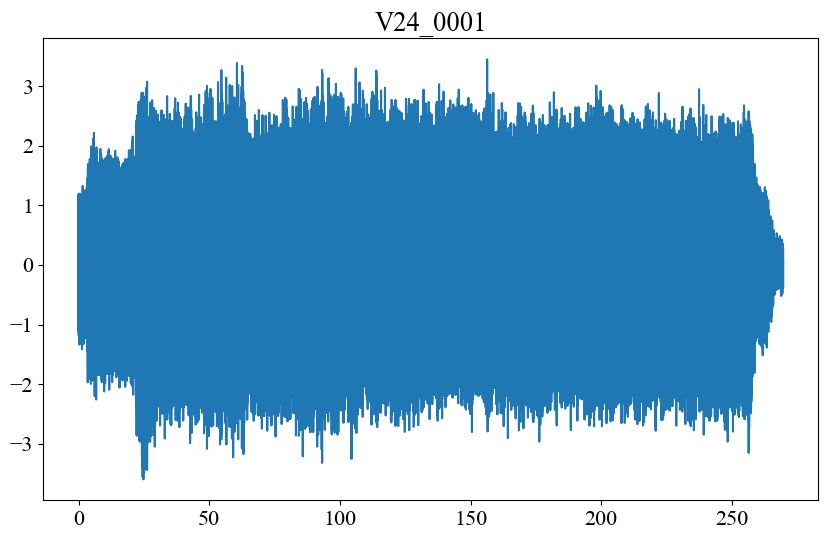

['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']


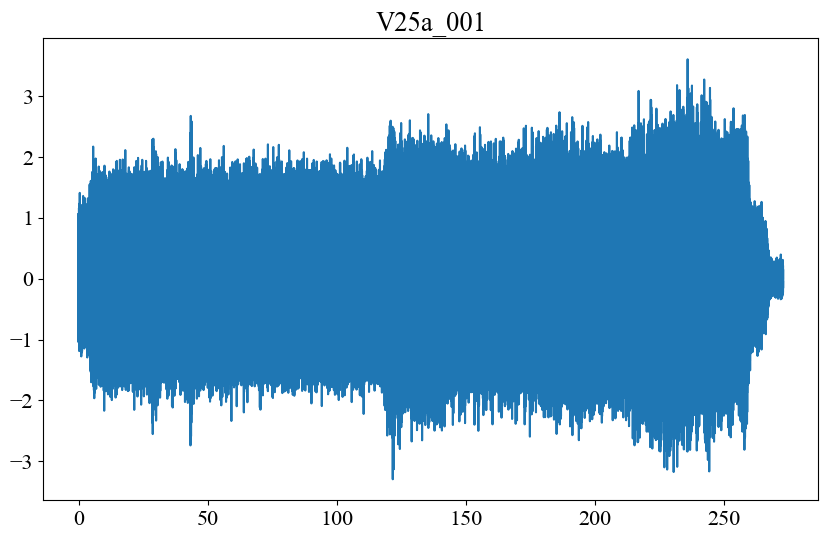

In [35]:
for key in data:
    print(data[key]["hdr"].comment)
    if "CH4_akustik" in data[key]["dat"]:
        plot_ts(data[key]["dat"]["CH4_akustik"], data[key]["dat"]["time"], key)
    elif "CH6_akustik" in data[key]["dat"]:
        plot_ts(data[key]["dat"]["CH6_akustik"], data[key]["dat"]["time"], key)

In [21]:
audio_data = np.array(pascal_array)

# Define the output file path (e.g., convert to WAV)
output_file = 'audio.wav'

# Save the audio data to a WAV file
sf.write(output_file, audio_data, 20000)

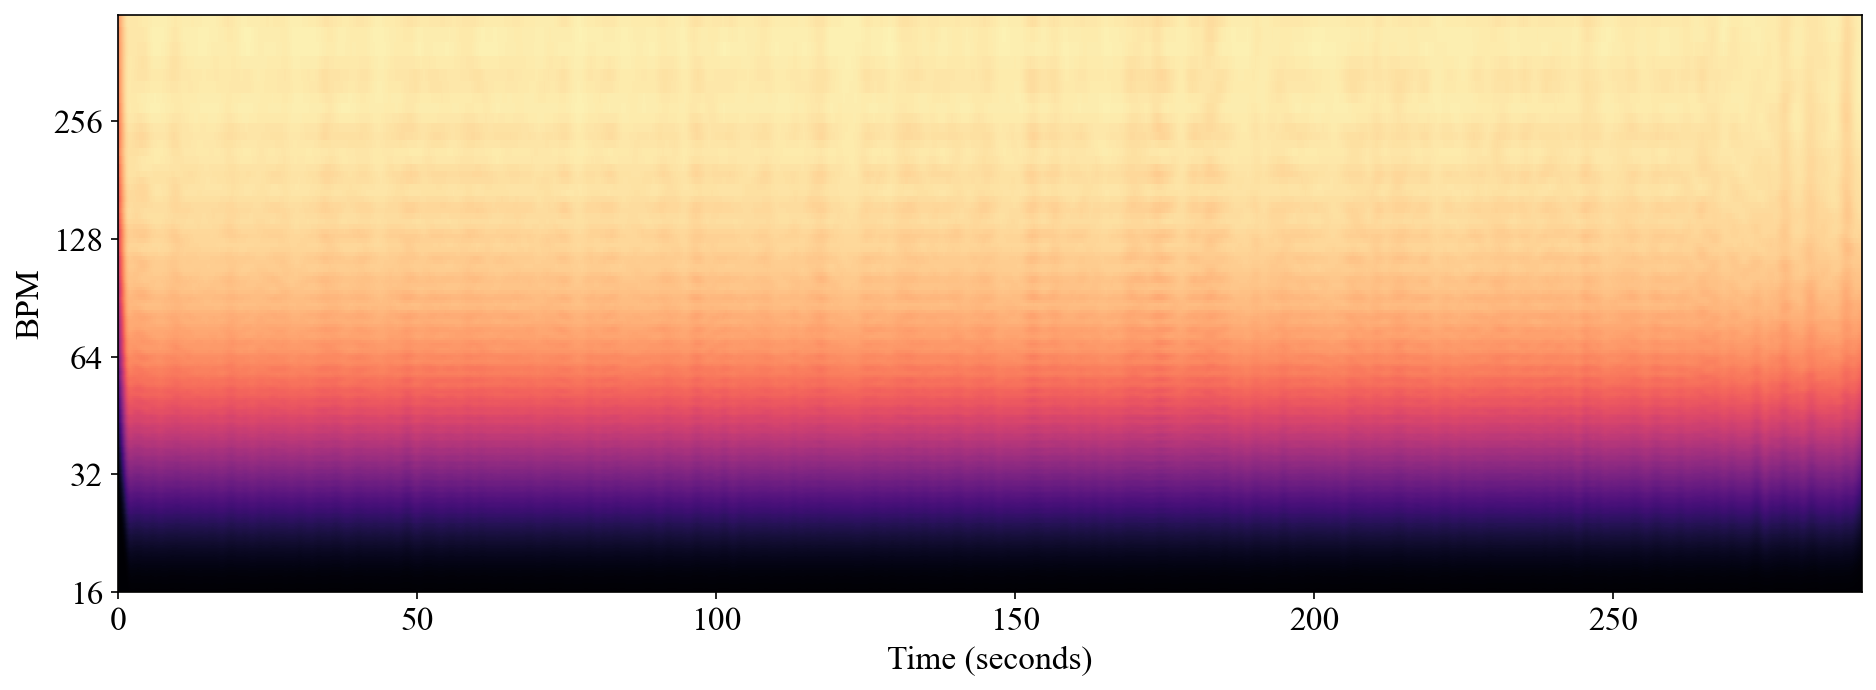

In [37]:
# Compute the onset strength
import matplotlib.pyplot as plt
import librosa
import numpy as np
from IPython.display import Audio, display

import ruptures as rpt  # our package

signal = pascal_array.to_numpy()

hop_length_tempo = 256
oenv = librosa.onset.onset_strength(
    y=signal, sr=20000, hop_length=hop_length_tempo
)
# Compute the tempogram
tempogram = librosa.feature.tempogram(
    onset_envelope=oenv,
    sr=20000,
)
# Display the tempogram
fig, ax = plt.subplots(figsize=(15, 5), dpi=150)
_ = librosa.display.specshow(
    tempogram,
    ax=ax,
    hop_length=hop_length_tempo,
    sr=20000,
    x_axis="s",
    y_axis="tempo",
)

In [34]:
# Choose detection method
algo = rpt.BottomUp(model="l1").fit(tempogram.T)
bkps = algo.predict(n_bkps=5)

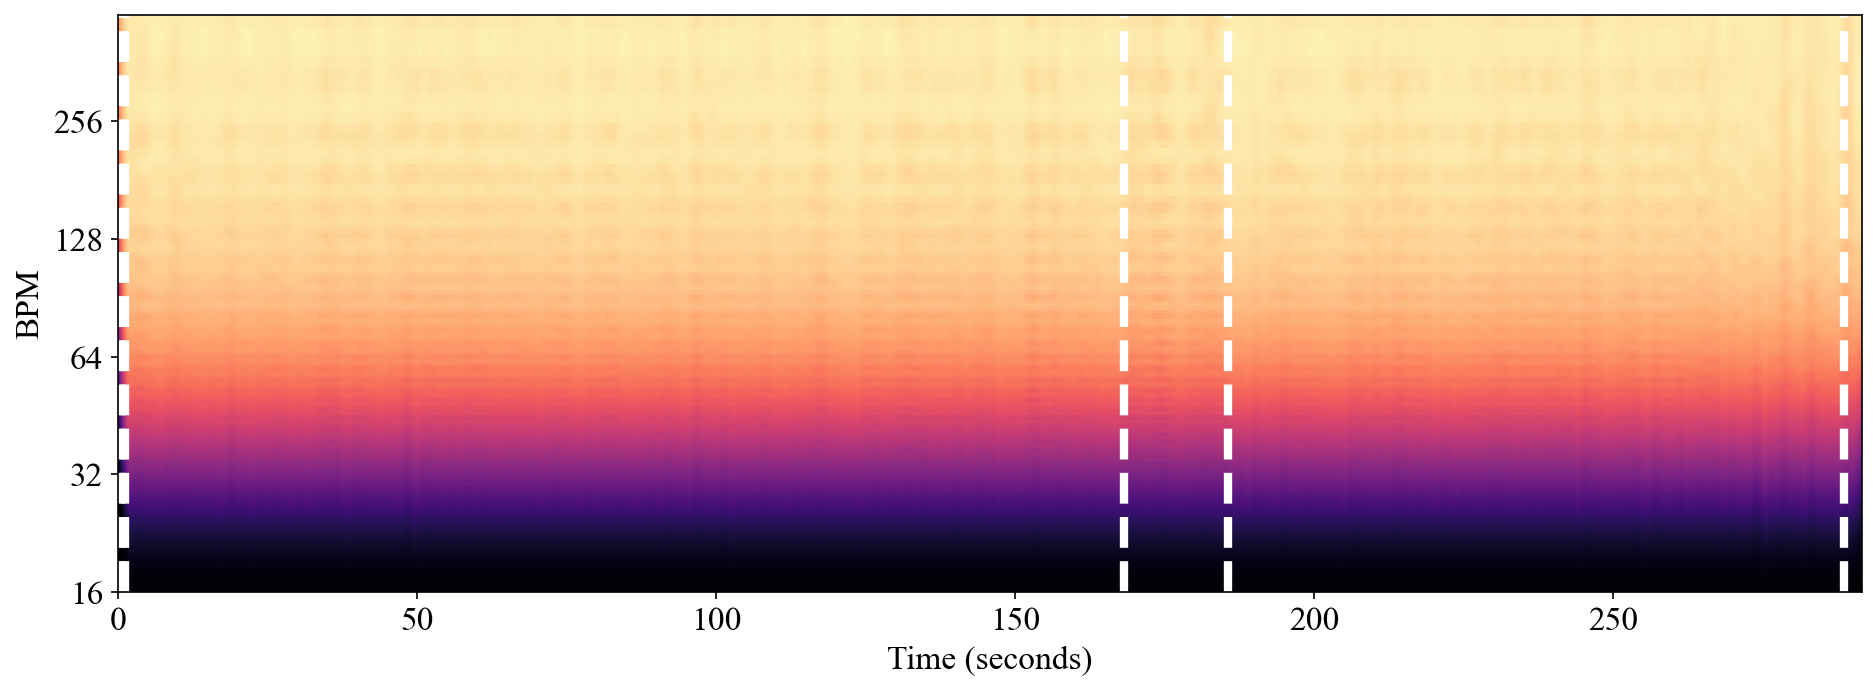

In [38]:
# Convert the estimated change points (frame counts) to actual timestamps
bkps_times = librosa.frames_to_time(bkps, sr=20000, hop_length=hop_length_tempo)

# Displaying results
fig, ax = plt.subplots(figsize=(15, 5), dpi=150)
_ = librosa.display.specshow(
    tempogram,
    ax=ax,
    x_axis="s",
    y_axis="tempo",
    hop_length=hop_length_tempo,
    sr=20000,
)

for b in bkps_times[:-1]:
    ax.axvline(b, ls="--", color="white", lw=4)

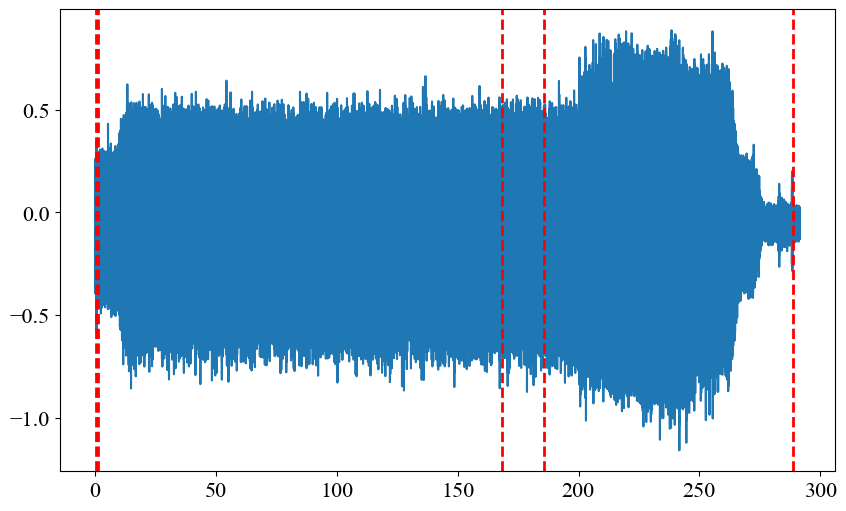

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(time, pascal_array)
for b in bkps_times[:-1]:
    plt.axvline(b, color="red", ls="--", lw=2)

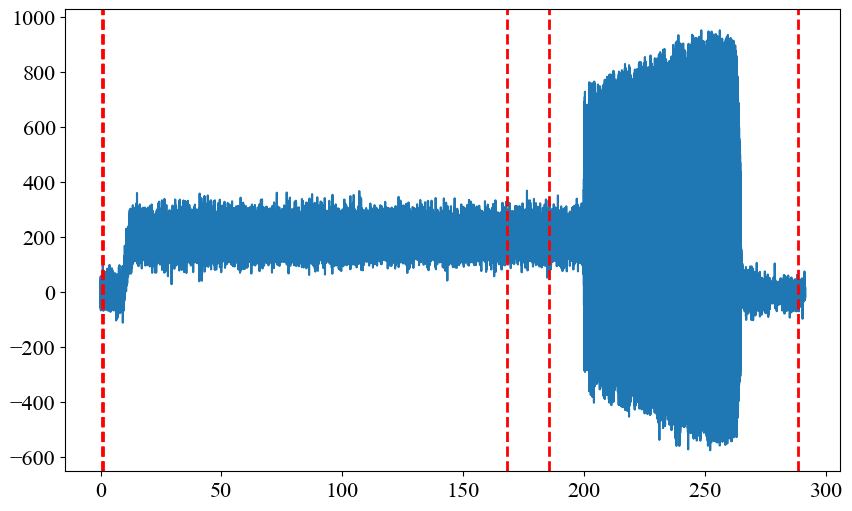

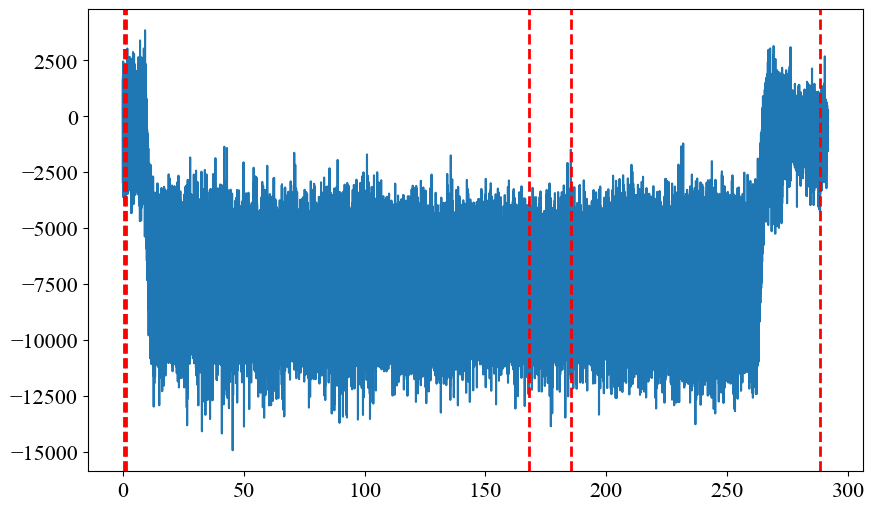

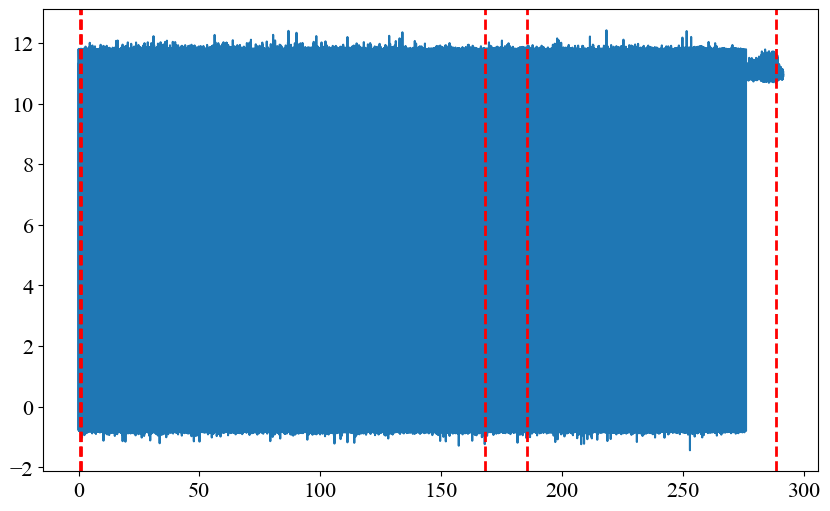

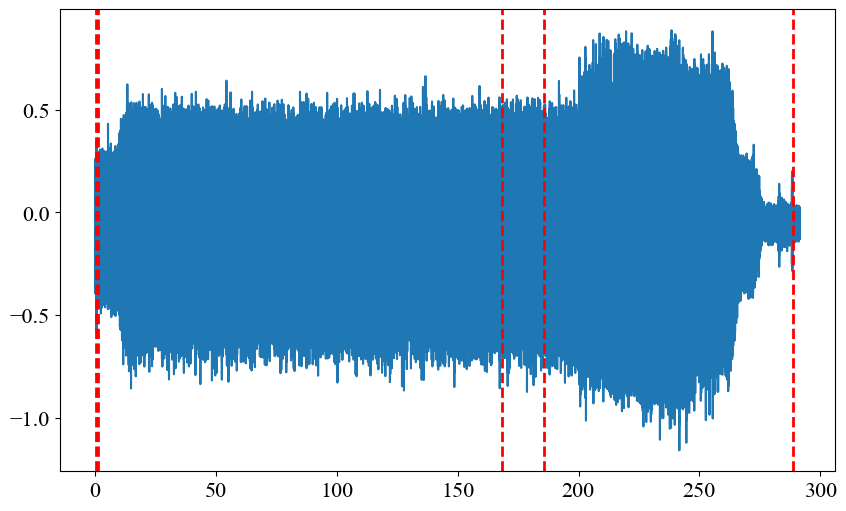

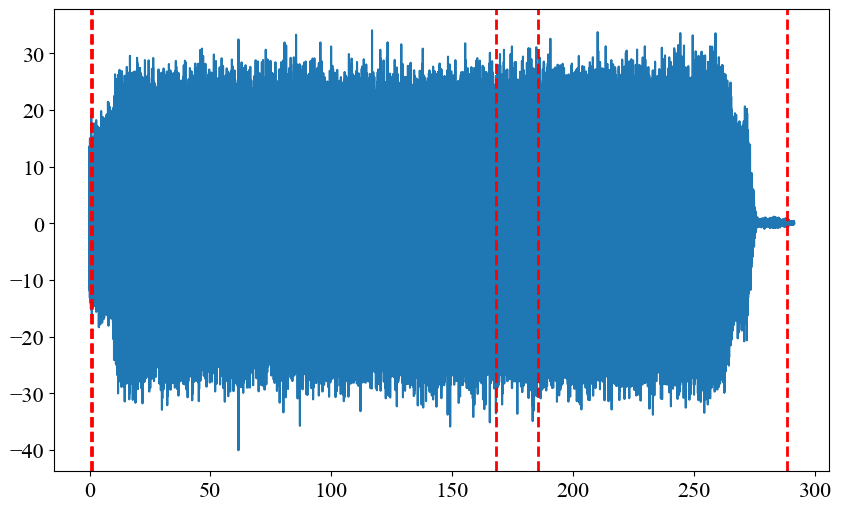

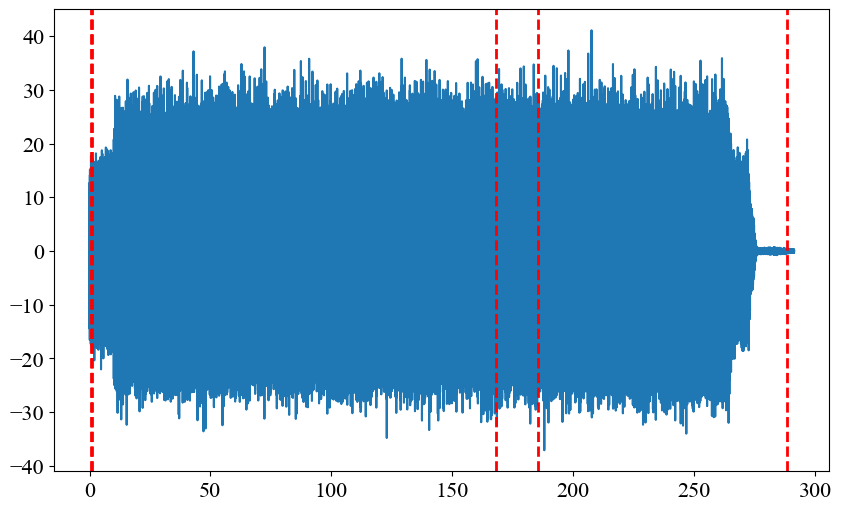

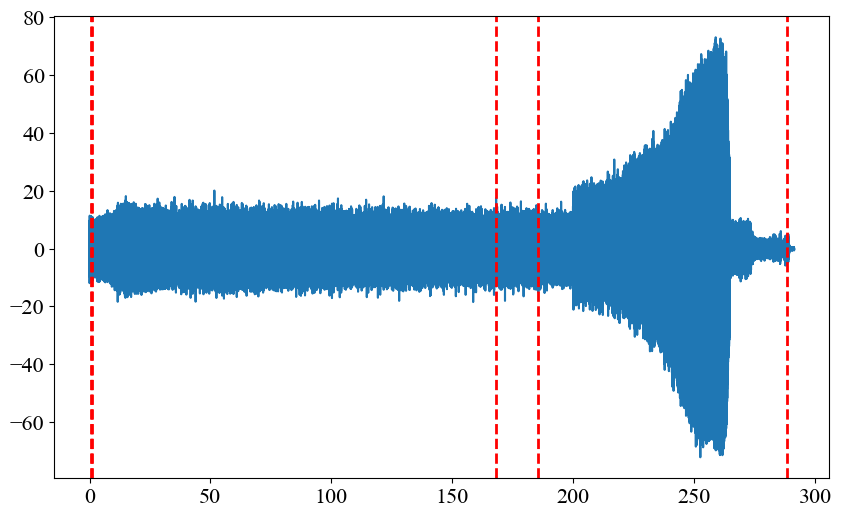

In [41]:
for channel in data["V2_00001"]["hdr"].channel_names:
    plt.figure(figsize=(10, 6))
    plt.plot(time, data["V2_00001"]["dat"][channel])
    for b in bkps_times[:-1]:
        plt.axvline(b, color="red", ls="--", lw=2)